1. Name: Sneha
2. Library:NLTK
3. URL: https://www.nltk.org/
4. Description:
NLTK is a leading Python library for working with human language data. It offers easy-to-use tools for text processing tasks like tokenization, stemming, tagging, parsing, and classification, and provides access to over 50 corpora and lexical resources such as WordNet. It also includes wrappers for advanced NLP libraries and has an active user community for support and discussion.(wrapper as a translator — it makes it easier for NLTK to “talk to” and use features from other software tools.)

In [1]:
!pip install nltk
#installing te library ( shows I akready did that previously)

In [26]:
import nltk

In [27]:
nltk.download('stopwords')
#Running nltk.download() opens a small window or menu that lets you choose and download datasets, models, and corpora (like text samples, tokenizers, stopword lists, etc.).

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sneha03/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [22]:
text= "Welcome to the programming tutorial on NLTK. Let's start with the basics to kick start"
tokenized=word_tokenize(text)
print(tokenized)

#word_tokenize() is a function in NLTK used to seperate each word 

['Welcome', 'to', 'the', 'programming', 'tutorial', 'on', 'NLTK', '.', 'Let', "'s", 'start', 'with', 'the', 'basics', 'to', 'kick', 'start']


In [23]:
print(sent_tokenize(text))
#sent_tokenize() is a function in NLTK used to split a paragraph (or any long text) into individual sentences.

['Welcome to the programming tutorial on NLTK.', "Let's start with the basics to kick start"]


<FreqDist with 14 samples and 17 outcomes>
[('to', 2), ('the', 2), ('start', 2)]


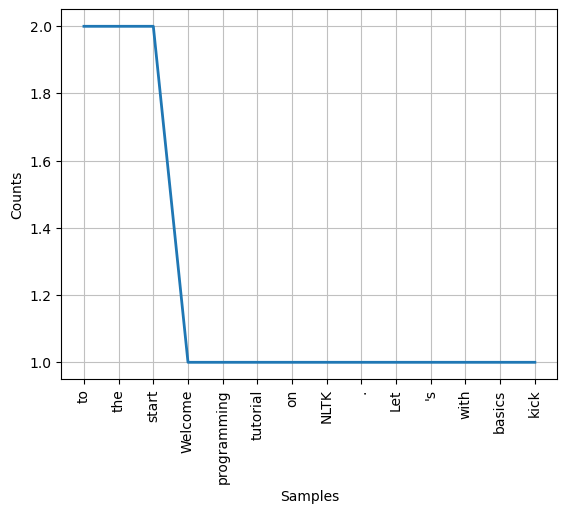

In [24]:
fd=FreqDist(tokenized)
print(fd)
#FreqDist() in NLTK (Natural Language Toolkit) is a function used to count how often each word (or token) appears in a text.
print(fd.most_common(3))
#most_common gets the word that's most occuring, since we have asked for 3 its shows the words with most occurence
fd.plot(30,cumulative=False)
plt.show()

In [36]:
#Stopwords are the common words in a language that usually don’t carry much meaning and are often removed from text before doing any analysis or natural language processing (NLP).
sw=stopwords.words('english')
print(set(sw))
# we could add them into a set since sometimes there are repating words
#removing stopwords 
without_stopwords=[]
for word in tokenized:
    if word not in sw:
        without_stopwords.append(word)
print("The list is different from teh tokenised list:",without_stopwords)  

{"shouldn't", 'having', 'hers', 'she', "i've", 'down', 'there', "weren't", 'are', "i'd", 'should', 'yours', 'shouldn', 'mustn', 'any', "we've", "it'd", 'to', 'won', 'just', 'because', "they're", "you'll", 'against', 'own', 'or', 'out', 'his', 'through', "mightn't", 'after', 'he', 'this', 'but', 'i', "won't", 'we', 'too', 'theirs', "they'll", "doesn't", "wasn't", 'will', 'it', 'll', "should've", 'wouldn', "he'll", 'off', "i'll", 'below', 'while', 'and', 'both', 'weren', 'what', "they've", "we're", 'their', 'm', 'that', 't', 'why', 'ma', 'shan', 'very', 'only', 'until', 'ain', 'does', 'our', 'in', 'doing', 'an', 'its', 'themselves', 'from', 'they', 'herself', 'by', "needn't", "you'd", 'over', 'above', 'about', 'did', "you're", 'have', "aren't", 'itself', "she'd", 'was', 'here', 'so', "we'll", 'these', 'him', 'am', 'needn', 'into', 'didn', "we'd", "she's", 'some', "they'd", 'when', 'with', 'further', 'her', 'the', "i'm", 'yourselves', 'o', 'do', 's', 'as', "isn't", 'for', "she'll", 'befor

"""
NLTK Tutorial: Movie Reviews Analysis
Complete walkthrough of NLTK features with movie reviews dataset

"""

In [37]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import RegexpParser
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import string

In [52]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('movie_reviews.csv')
print("Dataset loaded successfully!")
print(df.head())

[nltk_data] Downloading package punkt to /Users/sneha03/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sneha03/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/sneha03/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/sneha03/nltk_data...


Dataset loaded successfully!
                                              review  rating sentiment
0  This movie was absolutely fantastic! The actin...       5  positive
1  Terrible waste of time. The storyline was conf...       1  negative
2  A masterpiece of modern cinema. Every scene wa...       5  positive
3  I fell asleep halfway through. Boring and pred...       2  negative
4  Outstanding performance by the lead actor. The...       5  positive


[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /Users/sneha03/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sneha03/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sneha03/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
# ==================== 1. TEXT NORMALIZATION ====================
def normalize_text(text):
    """Convert text to lowercase, remove punctuation, and tokenize."""
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens


# Apply normalization
df['normalized'] = df['review'].apply(normalize_text)
print("\n1. TEXT NORMALIZATION COMPLETE")
print("Example:", df['normalized'][0][:10])


1. TEXT NORMALIZATION COMPLETE
Example: ['movie', 'absolutely', 'fantastic', 'acting', 'superb', 'plot', 'kept', 'engaged', 'throughout']


In [55]:
# ==================== 2. POS TAGGING & NER ====================
def get_pos_ner(text):
    """Get part-of-speech tags and named entities."""
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    named_entities = ne_chunk(pos_tags)
    return pos_tags, named_entities


# Apply POS tagging to first 5 reviews
df['pos_tags'] = df['review'].apply(lambda x: get_pos_ner(x)[0])
print("\n2. POS TAGGING COMPLETE")
print("Example POS tags:", df['pos_tags'][0][:5])


2. POS TAGGING COMPLETE
Example POS tags: [('This', 'DT'), ('movie', 'NN'), ('was', 'VBD'), ('absolutely', 'RB'), ('fantastic', 'JJ')]


In [56]:
# ==================== 3. CHUNKING PATTERNS ====================
def chunk_text(text):
    """Extract noun phrases using chunking patterns."""
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Define grammar for noun phrases
    grammar = "NP: {<DT>?<JJ>*<NN.*>+}"
    chunk_parser = RegexpParser(grammar)
    tree = chunk_parser.parse(pos_tags)
    
    # Extract chunks
    chunks = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            chunks.append(' '.join(word for word, tag in subtree.leaves()))
    
    return chunks


df['chunks'] = df['review'].apply(chunk_text)
print("\n3. CHUNKING COMPLETE")
print("Example chunks:", df['chunks'][0][:3])


3. CHUNKING COMPLETE
Example chunks: ['This movie', 'The acting', 'the plot']


In [57]:
# ==================== 4. SENTIMENT ANALYSIS (VADER) ====================
def analyze_sentiment(text):
    """Analyze sentiment using VADER."""
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)
    return scores['compound']


df['vader_score'] = df['review'].apply(analyze_sentiment)
print("\n4. VADER SENTIMENT ANALYSIS COMPLETE")
print("Example scores:", df[['review', 'vader_score']].head())




4. VADER SENTIMENT ANALYSIS COMPLETE
Example scores:                                               review  vader_score
0  This movie was absolutely fantastic! The actin...       0.8997
1  Terrible waste of time. The storyline was conf...      -0.7783
2  A masterpiece of modern cinema. Every scene wa...       0.8910
3  I fell asleep halfway through. Boring and pred...      -0.5423
4  Outstanding performance by the lead actor. The...       0.8720


In [58]:

# ==================== 5. SUPERVISED CLASSIFICATION ====================
def train_classifier(df):
    """Train a Naive Bayes classifier for sentiment."""
    # Prepare data
    X = df['review']
    y = df['sentiment']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Vectorize text
    vectorizer = CountVectorizer(max_features=100)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Train classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)
    
    # Predict and evaluate
    y_pred = classifier.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, classifier, vectorizer


accuracy, clf, vec = train_classifier(df)
print(f"\n5. SUPERVISED CLASSIFICATION COMPLETE")
print(f"Model Accuracy: {accuracy:.2%}")


5. SUPERVISED CLASSIFICATION COMPLETE
Model Accuracy: 50.00%


In [59]:
# ==================== 6. WORDNET SEMANTIC RELATIONS ====================
def explore_wordnet(word):
    """Get synonyms and definitions from WordNet."""
    synsets = wordnet.synsets(word)
    if synsets:
        syn = synsets[0]
        return {
            'definition': syn.definition(),
            'synonyms': [lemma.name() for lemma in syn.lemmas()][:5]
        }
    return None


# Explore key words
key_words = ['movie', 'fantastic', 'terrible', 'boring']
wordnet_data = {word: explore_wordnet(word) for word in key_words}
print("\n6. WORDNET SEMANTIC RELATIONS")
for word, data in wordnet_data.items():
    if data:
        print(f"{word}: {data['synonyms']}")


6. WORDNET SEMANTIC RELATIONS
movie: ['movie', 'film', 'picture', 'moving_picture', 'moving-picture_show']
fantastic: ['antic', 'fantastic', 'fantastical', 'grotesque']
terrible: ['awful', 'dire', 'direful', 'dread', 'dreaded']
boring: ['drilling', 'boring']


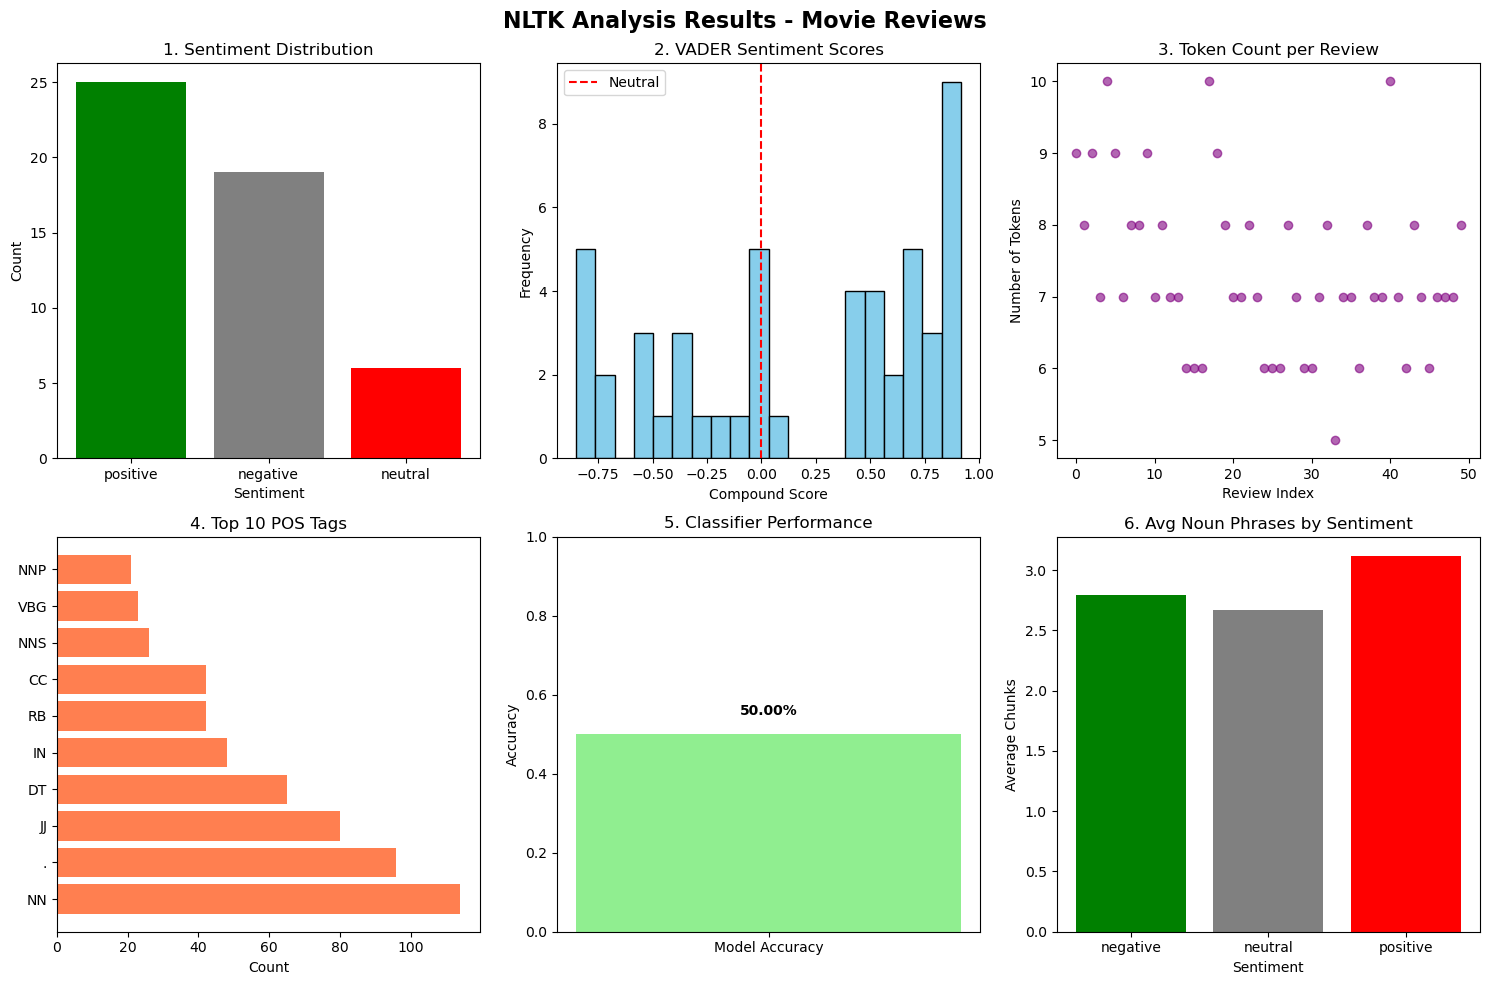

In [60]:
# ==================== 7. VISUALIZATION ====================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('NLTK Analysis Results - Movie Reviews', fontsize=16, fontweight='bold')

# Plot 1: Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
axes[0, 0].set_title('1. Sentiment Distribution')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Count')

# Plot 2: VADER Score Distribution
axes[0, 1].hist(df['vader_score'], bins=20, color='skyblue', edgecolor='black')
axes[0, 1].set_title('2. VADER Sentiment Scores')
axes[0, 1].set_xlabel('Compound Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(x=0, color='red', linestyle='--', label='Neutral')
axes[0, 1].legend()

# Plot 3: Average Token Length
df['token_count'] = df['normalized'].apply(len)
axes[0, 2].scatter(range(len(df)), df['token_count'], alpha=0.6, color='purple')
axes[0, 2].set_title('3. Token Count per Review')
axes[0, 2].set_xlabel('Review Index')
axes[0, 2].set_ylabel('Number of Tokens')

# Plot 4: POS Tag Distribution (top 10)
all_pos = [tag for tags in df['pos_tags'] for word, tag in tags]
pos_counts = pd.Series(all_pos).value_counts().head(10)
axes[1, 0].barh(pos_counts.index, pos_counts.values, color='coral')
axes[1, 0].set_title('4. Top 10 POS Tags')
axes[1, 0].set_xlabel('Count')

# Plot 5: Classification Accuracy
axes[1, 1].bar(['Model Accuracy'], [accuracy], color='lightgreen', width=0.4)
axes[1, 1].set_ylim([0, 1])
axes[1, 1].set_title('5. Classifier Performance')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].text(0, accuracy + 0.05, f'{accuracy:.2%}', ha='center', fontweight='bold')

# Plot 6: Average Chunks per Sentiment
df['chunk_count'] = df['chunks'].apply(len)
chunk_avg = df.groupby('sentiment')['chunk_count'].mean()
axes[1, 2].bar(chunk_avg.index, chunk_avg.values, color=['green', 'gray', 'red'])
axes[1, 2].set_title('6. Avg Noun Phrases by Sentiment')
axes[1, 2].set_xlabel('Sentiment')
axes[1, 2].set_ylabel('Average Chunks')

plt.tight_layout()
plt.show()